<header class="main-header">
    <img src="https://311.dc.gov/citizen/s/sfsites/c/resource/citizen_RedesignedMarkupImages/images/311-Seal.svg?0103S0000006d7h007" 
         alt="311 DC Seal" 
         style="width: 150px; height: auto; margin-bottom: 20px;">
    <h1 style="text-align: center;">311 Service Requests in Washington, D.C. (2024)</h1>
    <p style="text-align: center; font-size: 18px;">Analyzing Washington, D.C.'s non-emergency requests through the complete data science life cycle</p>
</header>

<div style="text-align: center; margin: 30px auto;">
    <h2 style="font-size: 20px; font-weight: bold;">Table of Contents</h2>
    <p style="font-size: 18px;">
        <a href="#introduction" style="color: #1A1A8E; text-decoration: none; font-weight: bold;">Introduction</a><br>
        <a href="#data-collection" style="color: #1A1A8E; text-decoration: none; font-weight: bold;">Data Collection</a><br>
        <a href="#data-analysis" style="color: #1A1A8E; text-decoration: none; font-weight: bold;">Data Preprocessing</a><br>
        <a href="#visualizations" style="color: #1A1A8E; text-decoration: none; font-weight: bold;">Exploratory Data Analysis and Visualization</a><br>
        <a href="#model-training" style="color: #1A1A8E; text-decoration: none; font-weight: bold;">Model Training and Testing</a><br>
        <a href="#conclusion" style="color: #1A1A8E; text-decoration: none; font-weight: bold;">Conclusion</a>
    </p>
</div>



*This project was conducted by me, Anum Sagheer, a student at the University of Maryland, College Park, as part of my Data Science coursework.*


## <span style="color:#3c3c96; font-weight:bold;"><h2 id="introduction">Introduction</h2></span>

The purpose of this project is to walk you through the **entire data science life cycle**, from data collection to insightful analysis and predictive modeling. To achieve this, I’ve chosen a dataset from [DC’s 311 City Service Requests in 2024](https://adoptablock.dc.gov/datasets/311-city-service-requests-in-2024/about). This dataset represents non-emergency service requests made by residents in Washington, D.C., such as bulk trash pickup, streetlight repairs, and pothole fixes. It serves as a critical resource for understanding how city services are utilized and how efficiently resources are allocated.

The core focus of this project is to answer the question:  

<span style="color:#800020; font-weight:bold;">How do 311 service requests in Washington, D.C. vary by type, neighborhood season, and how can predictive modeling support faster resolutions and resource planning?</span>

### Why is this important?

Understanding service requests is not just about fixing physical issues in a city; it provides a window into the needs and priorities of its residents.

By analyzing these requests, we know:

- **Seasonal trends**: How the demand for services fluctuates throughout the year.
- **Neighborhood-specific insights**: Which areas face higher demand for particular services.
- **Emerging needs**: Identifying the fastest-growing request types in 2024.
- **Operational efficiency**: How quickly requests are resolved and where delays are most common.



### What You’ll Learn from This Project

This project demonstrates how the tools and techniques of data science—ranging from data cleaning and exploratory analysis to predictive modeling and clustering—can be applied to real-world challenges. By the end of this analysis, you’ll have a clearer understanding of how data science can:

1. **Uncover actionable insights** to improve city operations.
2. **Predict future trends** to better allocate resources.
3. **Validate findings with statistical rigor** through hypothesis testing.

By focusing on Washington, D.C.’s 311 service requests, this project highlights the immense value of data science in solving everyday problems and improving public services.


## <span style="color:#3c3c96; font-weight:bold;"><h2 id="data-collection">Data Collection</h2></span>

Data collection is a foundational step in the Data Science lifecycle. It involves sourcing and organizing the data required for analysis, which serves as the backbone for deriving meaningful insights and building predictive models.

For this project, I used the **[311 City Service Requests in 2024](https://adoptablock.dc.gov/datasets/311-city-service-requests-in-2024/about)** dataset, which provides detailed information on non-emergency service requests made by residents of Washington, D.C. The dataset captures the following key attributes:

- **Request Type:** The type of service being requested.
- **Location Information:** Neighborhoods, wards, and addresses associated with the requests.
- **Date and Time:** Information about when the service request was made.
- **Resolution Time:** How long it took for the request to be addressed and resolved.

To facilitate analysis, the dataset was downloaded in `.csv` format and stored in the project directory under the file name `311_requests_2024.csv`. This dataset is critical for uncovering patterns in service requests, understanding neighborhood-specific demands, and analyzing the operational efficiency of city services.

This project was developed using **Python** in a Jupyter Notebook environment, leveraging powerful libraries such as Pandas, NumPy, Matplotlib, and Scikit-learn for data processing, visualization, and machine learning tasks. These tools were chosen for their versatility and suitability for a data science project.

Before diving into analysis, we imported the necessary libraries to clean, preprocess, and analyze the dataset effectively.


In [2]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns 

from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.graph_objects as go
import plotly.express as px

from scipy.stats import f_oneway

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Filter out the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
df = pd.read_csv('C:/Users/user/Desktop/ds final project/anumsagheer01.github.io/311-analysis/311_Requests_2024.csv')


In [4]:
df.head()


,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,DETAILS,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,GDB_FROM_DATE,GDB_TO_DATE,GDB_ARCHIVE_OID
0,398931.65,142784.180,11264889,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,1,2024/01/01 07:02:11+00,2024/01/09 19:41:49+00,...,NaN,NaN,{0DDE2DA2-2F6A-647C-E063-792F520A6A54},NaN,NaN,NaN,NaN,2024/09/09 07:29:33+00,9999/12/31 23:59:59+00,3832603.0
1,397426.26,143264.027,11264890,SPSTDAMA,Traffic Safety Input,Department of Transportation,DDOT,1,2024/01/01 12:46:57+00,2024/01/01 12:54:05+00,...,NaN,NaN,{0DE2FF5E-4ED1-278E-E063-792F520ABCD2},NaN,NaN,NaN,NaN,2024/09/09 07:29:33+00,9999/12/31 23:59:59+00,3832442.0
2,403311.22,134980.440,11264891,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,1,2024/01/01 13:39:26+00,2024/01/05 13:46:58+00,...,NaN,NaN,{0DE3A04B-F3D2-0B73-E063-792F520ABBA9},NaN,NaN,NaN,NaN,2024/09/09 07:29:33+00,9999/12/31 23:59:59+00,3832623.0
3,406498.92,135695.990,11264892,S0311,Rodent Inspection and Treatment,DOH- Department Of Health,DOH,1,2024/01/01 13:40:25+00,2024/01/02 15:36:35+00,...,NaN,NaN,{0DE3A04B-F3D3-0B73-E063-792F520ABBA9},NaN,NaN,NaN,NaN,2024/09/09 07:29:33+00,9999/12/31 23:59:59+00,3832624.0
4,398050.08,143079.590,11264893,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,1,2024/01/01 14:17:28+00,2024/01/04 12:59:13+00,...,NaN,NaN,{0DE44138-2C7A-1D36-E063-792F520A7FC1},NaN,NaN,NaN,NaN,2024/09/09 07:29:33+00,9999/12/31 23:59:59+00,3832625.0


## <span style="color:#3c3c96; font-weight:bold;"><h2 id="data-analysis">Data Preprocessing</h2></span>

It is crucial to preprocess the data to ensure its quality and usability. In this step, I clean and organize the dataset to make it ready for further analysis. Here's what is done:

1. **Convert `ADDDATE` to datetime format**: The `ADDDATE` column is converted to a datetime object to enable easy extraction of date-related features.
2. **Handle missing values**: Any rows where `ADDDATE` could not be parsed are removed to maintain data consistency.
3. **Extract useful features**:
   - `month`: The month is extracted from the `ADDDATE` column.
   - `day_of_week`: The day name (e.g., Monday, Tuesday) is extracted from the `ADDDATE` column.
4. **Keep relevant columns**: Only the most essential columns (`ADDDATE`, `SERVICECODEDESCRIPTION`, `STREETADDRESS`, `SERVICEORDERSTATUS`, `month`, `day_of_week`) are retained for analysis.



In [5]:
# Convert 'ADDDATE' to datetime format
df['ADDDATE'] = pd.to_datetime(df['ADDDATE'], errors='coerce')

# Remove any rows where 'ADDDATE' could not be parsed
df = df.dropna(subset=['ADDDATE'])

# Extract useful features like month and day of the week
df['month'] = df['ADDDATE'].dt.month
df['day_of_week'] = df['ADDDATE'].dt.day_name()

# Keep only the most relevant columns
df = df[['ADDDATE', 'SERVICECODEDESCRIPTION', 'STREETADDRESS', 'SERVICEORDERSTATUS', 'month', 'day_of_week']]

# Display the cleaned data
df.head()


,ADDDATE,SERVICECODEDESCRIPTION,STREETADDRESS,SERVICEORDERSTATUS,month,day_of_week
0,2024-01-01 07:02:11+00:00,Bulk Collection,5122 NEW HAMPSHIRE AVENUE NW,Closed,1,Monday
1,2024-01-01 12:46:57+00:00,Traffic Safety Input,13TH STREET NW AND LONGFELLOW STREET NW,Closed,1,Monday
2,2024-01-01 13:39:26+00:00,Abandoned Vehicle - On Public Property,3125 E STREET SE,Canceled,1,Monday
3,2024-01-01 13:40:25+00:00,Rodent Inspection and Treatment,15 53RD PLACE SE,Closed,1,Monday
4,2024-01-01 14:17:28+00:00,Streetlight Repair Investigation,5400 7TH STREET NW,Closed,1,Monday


## <span style="color:#3c3c96; font-weight:bold;"><h2 id="visualizations">Exploratory Data Analysis and Visualization </h2></span>

Now, I explore the dataset to identify meaningful insights and patterns, visualizing them through graphs for better understanding.

### Monthly Trends
*What are the patterns in 311 service requests throughout the year?*

This helps us identify peak months when demand for city services is highest, allowing the city to better allocate resources and prepare for increased demand.



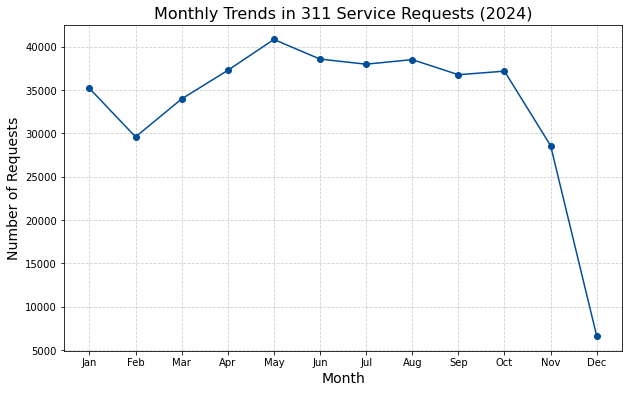

In [6]:
# Count the number of requests for each month
monthly_trends = df.groupby('month').size()

# Plot the monthly trends
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='line', marker='o', color='#004d99')
plt.title('Monthly Trends in 311 Service Requests (2024)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Requests', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


**Insights:**

1. **Peak Demand**: May has the highest number of requests, likely due to seasonal issues like spring cleaning or maintenance needs.

2. **Low Activity**: January, February, and December show fewer requests, possibly due to colder weather or holiday periods.

3. **Stable Period**: June to October displays steady demand, indicating consistent issues throughout these months.

4. **December Drop**: A sharp decline in December suggests reduced activity during winter holidays.

**Implications:**
- **Resource Planning**: Allocate more resources in May to handle peak demand.
- **Seasonal Focus**: Optimize staff and services for low-demand months like January and December.
- **Trend Analysis**: Explore specific request types driving these patterns for better preparedness.


### Weekly Trends

*What are the patterns in 311 service requests throughout the week?*

This analysis highlights the busiest days for city services, helping to understand when resources are most in demand and ensuring optimal staff allocation to handle spikes.


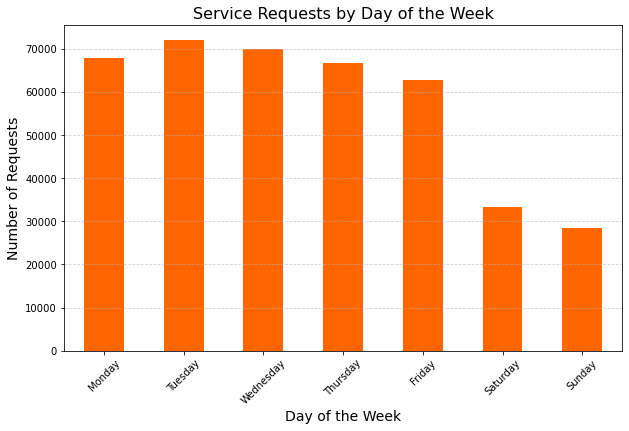

In [7]:
# Count the number of requests by day of the week
weekly_trends = df['day_of_week'].value_counts()

# Plot the weekly trends
plt.figure(figsize=(10, 6))
weekly_trends.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot(
    kind='bar', color='#ff6600'
)
plt.title('Service Requests by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Requests', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


**Insights:**
- **Tuesday** and **Wednesday** see the highest number of requests, indicating peak demand for city services during these days.
- **Saturday** and **Sunday** have significantly fewer requests, reflecting lower activity during weekends.
- This trend suggests that city resources and staff should be prioritized during weekdays, especially midweek, to handle the higher influx of service requests effectively.


### Top Service Request Types

*What are the most common types of 311 service requests?*

This visualization provides insights into the top 5 service request types submitted by residents. By identifying these common requests, the city can better prioritize resources and address recurring issues that significantly impact the community.

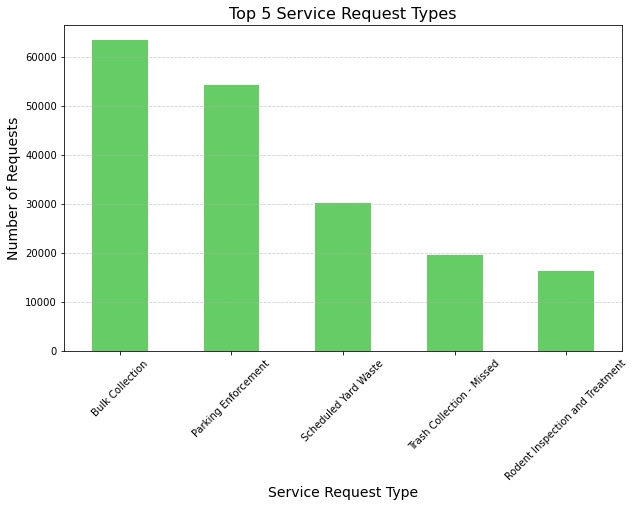

In [8]:
# Count the most common service request types
top_service_types = df['SERVICECODEDESCRIPTION'].value_counts().head(5)

# Plot the top service types
plt.figure(figsize=(10, 6))
top_service_types.plot(kind='bar', color='#66cc66')
plt.title('Top 5 Service Request Types', fontsize=16)
plt.xlabel('Service Request Type', fontsize=14)
plt.ylabel('Number of Requests', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


**Insights:**
- **Bulk Collection** accounts for the highest number of requests, indicating significant demand for managing large trash items.
- **Parking Enforcement** follows closely, emphasizing the importance of regulating parking in the city.
- Other common requests include **Scheduled Yard Waste**, **Missed Trash Collection**, and **Rodent Inspection and Treatment**, highlighting routine city maintenance needs.
- These insights help prioritize city resources to address the most frequently requested services efficiently.


*What seasonal patterns exist in 311 service requests, and how can the city prepare for spikes in demand?*

In [9]:
# Define a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a 'season' column
df['season'] = df['month'].apply(get_season)

# Preview the updated dataset
df.head()


,ADDDATE,SERVICECODEDESCRIPTION,STREETADDRESS,SERVICEORDERSTATUS,month,day_of_week,season
0,2024-01-01 07:02:11+00:00,Bulk Collection,5122 NEW HAMPSHIRE AVENUE NW,Closed,1,Monday,Winter
1,2024-01-01 12:46:57+00:00,Traffic Safety Input,13TH STREET NW AND LONGFELLOW STREET NW,Closed,1,Monday,Winter
2,2024-01-01 13:39:26+00:00,Abandoned Vehicle - On Public Property,3125 E STREET SE,Canceled,1,Monday,Winter
3,2024-01-01 13:40:25+00:00,Rodent Inspection and Treatment,15 53RD PLACE SE,Closed,1,Monday,Winter
4,2024-01-01 14:17:28+00:00,Streetlight Repair Investigation,5400 7TH STREET NW,Closed,1,Monday,Winter


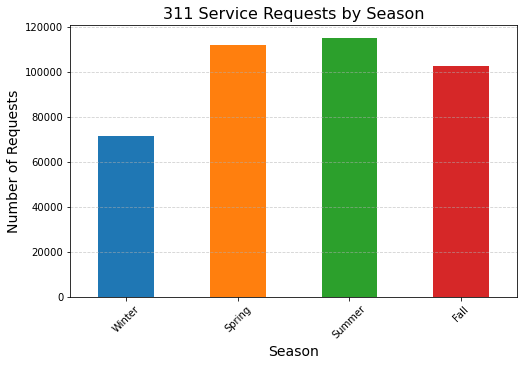

In [10]:
# Group data by season to analyze total requests
seasonal_trends = df.groupby('season').size()

# Plot seasonal trends
plt.figure(figsize=(8, 5))
seasonal_trends.loc[['Winter', 'Spring', 'Summer', 'Fall']].plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('311 Service Requests by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Number of Requests', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


**Insights:**
- **Summer** sees the highest number of service requests, indicating a seasonal increase in demand, possibly due to outdoor activities or maintenance needs.
- **Spring** and **Fall** follow closely, showing steady service demands during transitional seasons.
- **Winter** has the lowest number of requests, likely due to reduced outdoor activities and fewer maintenance-related issues.
- This seasonal analysis can help the city plan and allocate resources efficiently, ensuring timely responses during peak seasons.


In [11]:
# Group data by season and service type
requests_by_season = df.groupby(['season', 'SERVICECODEDESCRIPTION']).size().reset_index(name='count')

# Find the top 3 request types for each season
top_requests_by_season = (
    requests_by_season.groupby('season', group_keys=False)
    .apply(lambda x: x.nlargest(3, 'count'))
    .reset_index(drop=True)
)

# Display the top requests for each season
print(top_requests_by_season)


    season     SERVICECODEDESCRIPTION  count
0     Fall            Bulk Collection  15420
1     Fall        Parking Enforcement  14962
2     Fall       Scheduled Yard Waste   8307
3   Spring            Bulk Collection  18564
4   Spring        Parking Enforcement  15509
5   Spring       Scheduled Yard Waste  10009
6   Summer            Bulk Collection  19292
7   Summer        Parking Enforcement  15089
8   Summer       Scheduled Yard Waste   9427
9   Winter            Bulk Collection  10142
10  Winter        Parking Enforcement   8667
11  Winter  Trash Collection - Missed   6424


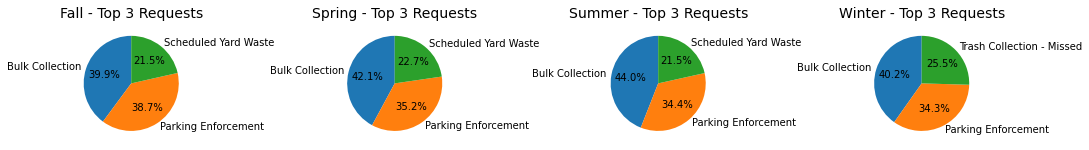

In [12]:
seasons = top_requests_by_season['season'].unique()

fig, axes = plt.subplots(1, len(seasons), figsize=(15, 6))
for i, season in enumerate(seasons):
    data = top_requests_by_season[top_requests_by_season['season'] == season]
    axes[i].pie(data['count'], labels=data['SERVICECODEDESCRIPTION'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"{season} - Top 3 Requests", fontsize=14)

plt.tight_layout()
plt.show()


The results reveal that **Bulk Collection**, **Parking Enforcement**, and **Scheduled Yard Waste** consistently dominate across seasons. Such insights help tailor city services to meet seasonal demands effectively.


*What types of 311 service requests are growing the fastest in 2024, and what does that tell us about emerging community needs?*


### Key Observations:

- **211 Warmline Service Request**: In March, there was a sharp **75% decrease** in requests compared to February.

- **Abandoned Vehicle - On Public Property**: There was a **23.98% increase** in April compared to March, followed by a **12.13% decrease** in May.

- **Tree Pruning**: This shows consistent growth, with **71.14% increase** in March, followed by **69.02% in April** and **107.42% in May**, indicating a seasonal rise in demand for this service.

- **Wire Down/Power Outage**: This fluctuates widely, with **30.43% decrease** in February, followed by a **12.50% increase** in March and a **61.11% increase** in April.


In [13]:
# Group data by month and service type to count requests
monthly_service_counts = (
    df.groupby(['month', 'SERVICECODEDESCRIPTION'])
    .size()
    .reset_index(name='count')
)

# Preview the grouped data
print(monthly_service_counts.head())


   month                   SERVICECODEDESCRIPTION  count
0      1             211 Warmline Service Request      4
1      1                        Abandoned Bicycle     45
2      1  Abandoned Vehicle - On Private Property     86
3      1   Abandoned Vehicle - On Public Property    629
4      1                             Alley Repair     56


In [14]:
# Pivot the data to get service types as columns and months as rows
pivot_table = monthly_service_counts.pivot(
    index='month', columns='SERVICECODEDESCRIPTION', values='count'
)

# Calculate the month-over-month percentage growth
growth_rates = pivot_table.pct_change().fillna(0) * 100

# Preview the growth rates
print(growth_rates.head())


SERVICECODEDESCRIPTION  211 Warmline Service Request  \
month                                                  
1                                                0.0   
2                                                0.0   
3                                              -75.0   
4                                                0.0   
5                                                0.0   

SERVICECODEDESCRIPTION  311Force Reported Issues  Abandoned Bicycle  \
month                                                                 
1                                            0.0           0.000000   
2                                            0.0          11.111111   
3                                            0.0         130.000000   
4                                            0.0         -21.739130   
5                                            0.0         -25.555556   

SERVICECODEDESCRIPTION  Abandoned Vehicle - On Private Property  \
month                                     

In [15]:
# Calculate the average growth rate for each service type across months
average_growth = growth_rates.mean().sort_values(ascending=False)

# Display the top 5 fastest-growing service types
top_growing_services = average_growth.head(5)
print(top_growing_services)


SERVICECODEDESCRIPTION
Illegal Fireworks                     389.360327
DMV - Driver Record Issues            134.292328
Bee Treatment and Inspection (DOH)     78.294423
Grass Mowing Services Missed (DGS)     75.119755
Sample SR                              75.000000
dtype: float64


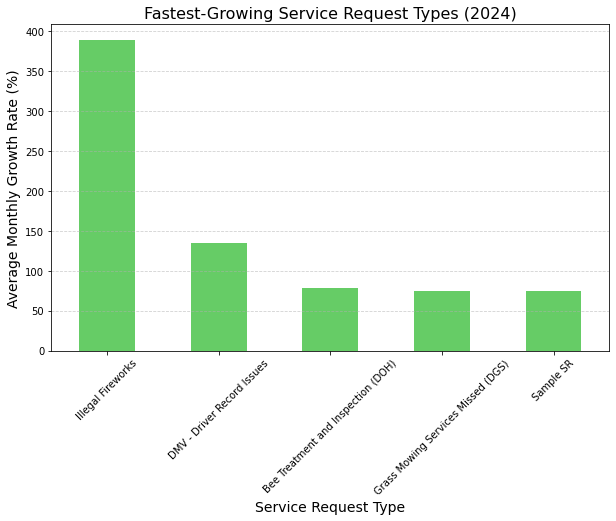

In [16]:
# Plot the top 5 fastest-growing service types
plt.figure(figsize=(10, 6))
top_growing_services.plot(kind='bar', color='#66cc66')
plt.title('Fastest-Growing Service Request Types (2024)', fontsize=16)
plt.xlabel('Service Request Type', fontsize=14)
plt.ylabel('Average Monthly Growth Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


- **Illegal Fireworks** experienced the highest average monthly growth rate of approximately 389%, indicating a significant rise in requests for this service in 2024.  
- The government can address the rapid growth by enforcing stricter regulations and increasing public awareness.



*How quickly are 311 service requests being resolved in 2024, and which request types have the longest wait times?*



In [17]:
# Reload the original dataset
original_df = pd.read_csv('C:/Users/user/Desktop/ds final project/anumsagheer01.github.io/311-analysis/311_Requests_2024.csv')


# Extract only the 'RESOLUTIONDATE' column
resolution_date = original_df[['RESOLUTIONDATE']]

# Add the 'RESOLUTIONDATE' column back to the cleaned dataset
df = pd.concat([df.reset_index(drop=True), resolution_date.reset_index(drop=True)], axis=1)

# Check if 'RESOLUTIONDATE' is successfully added
print(df.columns)

Index(['ADDDATE', 'SERVICECODEDESCRIPTION', 'STREETADDRESS',
       'SERVICEORDERSTATUS', 'month', 'day_of_week', 'season',
       'RESOLUTIONDATE'],
      dtype='object')


In [18]:
# Ensure ADDDATE and RESOLUTIONDATE are in datetime format
df['ADDDATE'] = pd.to_datetime(df['ADDDATE'], errors='coerce')
df['RESOLUTIONDATE'] = pd.to_datetime(df['RESOLUTIONDATE'], errors='coerce')

# Calculate resolution time in hours
df['resolution_time'] = (df['RESOLUTIONDATE'] - df['ADDDATE']).dt.total_seconds() / 3600

# Remove rows with missing or negative resolution times
df = df[df['resolution_time'] >= 0]

# Preview the dataset
print(df[['ADDDATE', 'RESOLUTIONDATE', 'resolution_time']].head())


                    ADDDATE            RESOLUTIONDATE  resolution_time
0 2024-01-01 07:02:11+00:00 2024-01-09 19:41:49+00:00       204.660556
1 2024-01-01 12:46:57+00:00 2024-01-01 12:54:05+00:00         0.118889
2 2024-01-01 13:39:26+00:00 2024-01-05 13:46:58+00:00        96.125556
3 2024-01-01 13:40:25+00:00 2024-01-02 15:36:35+00:00        25.936111
4 2024-01-01 14:17:28+00:00 2024-01-04 12:59:13+00:00        70.695833


In [19]:
# Remove rows with missing or negative resolution times
df = df[df['resolution_time'] >= 0]


In [20]:
# Calculate average resolution time by request type
avg_resolution_time = df.groupby('SERVICECODEDESCRIPTION')['resolution_time'].mean().reset_index()

# Rename columns for clarity
avg_resolution_time.columns = ['request_type', 'avg_resolution_time']

# Sort by longest resolution time
avg_resolution_time = avg_resolution_time.sort_values(by='avg_resolution_time', ascending=False)

# Preview the result
print(avg_resolution_time.head(10))  # Top 10 request types with longest resolution times


                                          request_type  avg_resolution_time
70   Lost/Stolen Compost Bin, Broken Compost Bin or...          4186.375798
102              Snow Removal Complaints for Sidewalks          2299.443420
114                                  Trash Cart Repair          2144.344642
85                             Recycling Cart - Repair          2130.365332
109                                  Supercan - Repair          2001.045248
16                                DC Spray Parks (DGS)          1853.551944
98                                     Sidewalk Repair          1739.828637
82                          Rat Replacement Containers          1732.809763
5                                         Alley Repair          1405.775706
15       DC Indoor and Outdoor Pool Maintenance  (DGS)          1397.740556


- The resolution time for each request was computed in hours by subtracting `ADDDATE` from `RESOLUTIONDATE`.
- Rows with missing or negative resolution times were filtered out to ensure meaningful data.
- Average resolution times were calculated for each request type by grouping the data by `SERVICECODEDESCRIPTION`.
- The request types were sorted in descending order to identify those with the longest resolution times.

- The calculated `resolution_time` column showed how long each request took to resolve in hours.


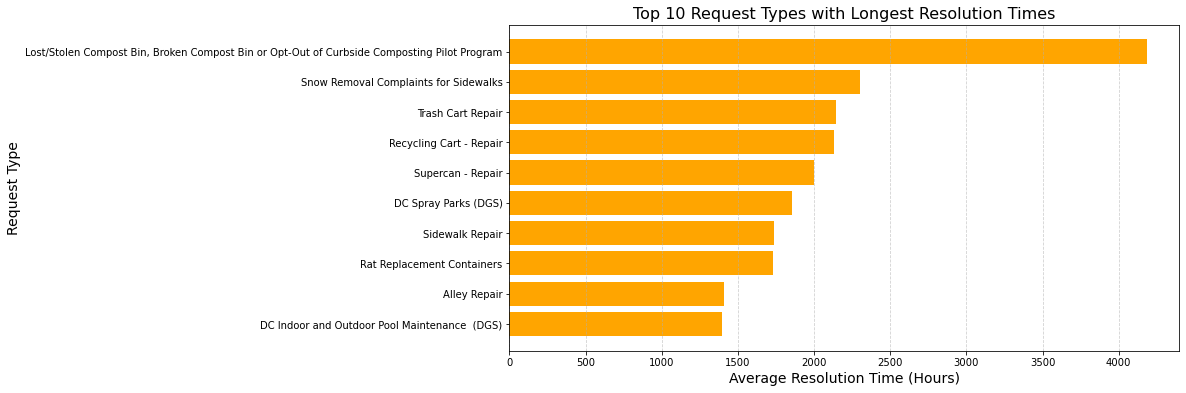

In [21]:
# Plot the top 10 request types with longest resolution times
top_request_types = avg_resolution_time.head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_request_types['request_type'], top_request_types['avg_resolution_time'], color='orange')
plt.xlabel('Average Resolution Time (Hours)', fontsize=14)
plt.ylabel('Request Type', fontsize=14)
plt.title('Top 10 Request Types with Longest Resolution Times', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


- The longest average resolution time was for "Lost/Stolen Compost Bin, Broken Compost Bin or Opt-Out of Curbside Composting Pilot Program" at over 4,000 hours.
- Other slow requests included snow removal complaints, trash cart repair, and recycling cart repair.

- This analysis reveals the services with the longest delays in resolution, highlighting potential inefficiencies. Requests like compost bin replacements and snow removal complaints take disproportionately long to resolve, indicating a need for process optimization.


### Hypothesis Testing

Hypothesis testing is a statistical method used to determine whether there is enough evidence to reject a null hypothesis. It helps validate assumptions about a dataset by comparing observed data to what is expected under the null hypothesis. The goal is to draw meaningful conclusions from the data by assessing the statistical significance of the results.


- Hypothesis Testing: Resolution Times
- **Null Hypothesis (H₀):** There is no significant difference in the resolution times across different request types.
- **Alternative Hypothesis (H₁):** Certain request types take significantly longer to resolve.

The aim of this hypothesis test is to evaluate whether the resolution times vary significantly across different types of 311 service requests. By determining this, we can identify whether specific service categories consistently take longer to address, which could highlight inefficiencies or areas requiring operational improvements.
This analysis can guide policymakers in addressing bottlenecks and improving service timelines for specific categories.


In [22]:
# Ensure 'resolution_time' column exists and contains valid data
print(df[['SERVICECODEDESCRIPTION', 'resolution_time']].head())


                   SERVICECODEDESCRIPTION  resolution_time
0                         Bulk Collection       204.660556
1                    Traffic Safety Input         0.118889
2  Abandoned Vehicle - On Public Property        96.125556
3         Rodent Inspection and Treatment        25.936111
4        Streetlight Repair Investigation        70.695833


In [23]:
# Group resolution times by request types
grouped_data = [df[df['SERVICECODEDESCRIPTION'] == request_type]['resolution_time'] 
                for request_type in df['SERVICECODEDESCRIPTION'].unique()]

# Print the number of groups to confirm
print(f"Number of groups: {len(grouped_data)}")


Number of groups: 123


In [24]:
from scipy.stats import f_oneway

# Perform one-way ANOVA test
f_stat, p_value = f_oneway(*grouped_data)

# Print the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in resolution times across request types.")
else:
    print("Fail to reject the null hypothesis: No significant difference in resolution times across request types.")


F-statistic: 1870.2830690634703
P-value: 0.0
Reject the null hypothesis: There is a significant difference in resolution times across request types.


Hypothesis testing was conducted to determine whether there is a statistically significant difference in resolution times across different 311 service request types. The null hypothesis (H₀) assumed no significant difference in resolution times between request types, while the alternative hypothesis (H₁) proposed that some request types take significantly longer to resolve. This analysis helps identify inefficiencies or bottlenecks in service categories requiring operational improvements.

First, the dataset was checked to ensure the `resolution_time` column existed and contained valid data. The data was then grouped by request type to analyze resolution times for each unique category. Using a one-way ANOVA test, the F-statistic and p-value were calculated. The results showed an extremely low p-value (< 0.05), leading to the rejection of the null hypothesis. This indicates that there is a significant difference in resolution times across request types. Certain categories consistently have longer resolution times, which highlights potential inefficiencies.

To visualize the distribution of resolution times across request types, a boxplot was created. This plot provided insights into the variability and outliers for each service category. The findings underscore the importance of identifying specific request types with prolonged resolution times to prioritize resource allocation, streamline workflows, and improve overall service efficiency.


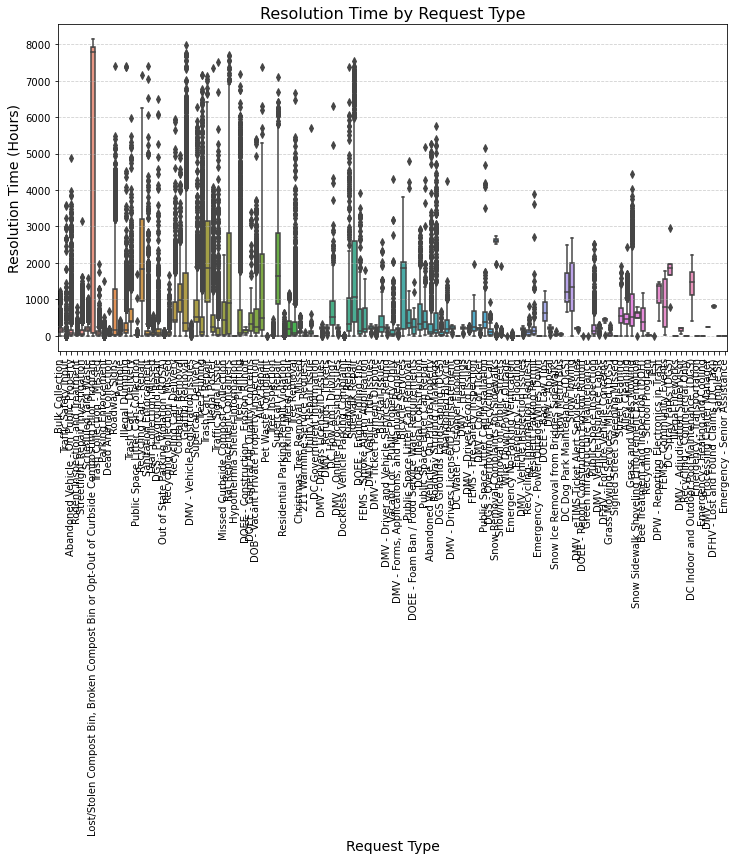

In [25]:
# Plot resolution time distributions by request types
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='SERVICECODEDESCRIPTION', y='resolution_time')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Resolution Time by Request Type', fontsize=16)
plt.xlabel('Request Type', fontsize=14)
plt.ylabel('Resolution Time (Hours)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


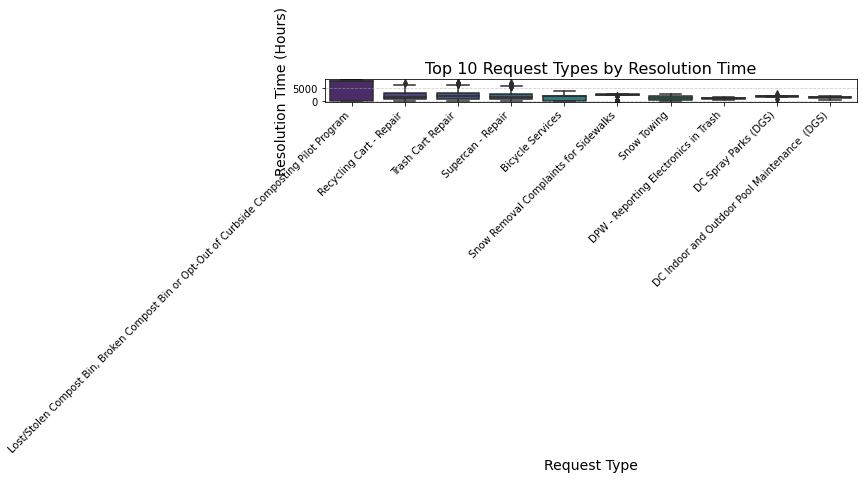

In [26]:
# Select top 10 request types by median resolution time
top_request_types = (
    df.groupby('SERVICECODEDESCRIPTION')['resolution_time']
    .median()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter the data for these request types
filtered_data = df[df['SERVICECODEDESCRIPTION'].isin(top_request_types)]

# Plot the boxplot for the selected request types
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='SERVICECODEDESCRIPTION', y='resolution_time', palette='viridis')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and adjust x-axis labels
plt.title('Top 10 Request Types by Resolution Time', fontsize=16)
plt.xlabel('Request Type', fontsize=14)
plt.ylabel('Resolution Time (Hours)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


- I calculated the median resolution time for each request type and selects the top 10 request types with the highest medians.
- I filtered the dataset to include only these top 10 request types and plots a boxplot to visualize their resolution time distributions.
- Request types with wide spreads or numerous outliers indicate inconsistent resolution times, which could signal inefficiencies or process delays.


The "Lost/Stolen Compost Bin, Broken Compost Bin or Opt-Out of Curbside Composting Pilot Program" has median resolution time exceeding 5000 hours (over 208 days)—almost enough time to compost the bin itself!

The government could-
1. **Streamline Processes**: Simplify workflows and reduce administrative delays.
2. **Increase Resources**: Add more staff and funding to handle compost bin requests.
3. **Real-Time Tracking**: Implement tracking systems to keep residents updated.
4. **Community Education**: Promote awareness to reduce bin-related issues.
5. **Regular Audits**: Periodically review the process to identify bottlenecks.


## <span style="color:#3c3c96; font-weight:bold;"><h2 id="model-training">Model Training and Testing</h2></span>

*Can we predict the top 5 311 service requests in the next 3 months based on past trends and seasonal changes?*


By leveraging past data and seasonal patterns, we will train and test machine learning models to forecast future requests, enabling better resource planning and management.


In [27]:
# Aggregate the data by date to count daily requests
df['date'] = df['ADDDATE'].dt.date  # Extract just the date (no time)
daily_requests = df.groupby('date').size().reset_index(name='count')

# Convert 'date' back to a datetime object for time series analysis
daily_requests['date'] = pd.to_datetime(daily_requests['date'])

# Set the 'date' column as the index
daily_requests.set_index('date', inplace=True)

# Preview the data
print(daily_requests.head())


            count
date             
2024-01-01    265
2024-01-02   1200
2024-01-03   1472
2024-01-04   1254
2024-01-05   1164


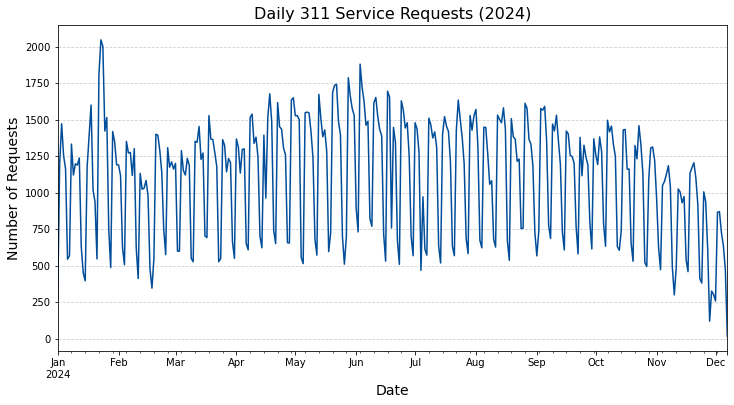

In [28]:
# Plot daily service requests
plt.figure(figsize=(12, 6))
daily_requests['count'].plot(color='#004d99')
plt.title('Daily 311 Service Requests (2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Requests', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [29]:
import logging
logging.getLogger('cmdstanpy').disabled = True

# Create an empty dictionary to store forecasts for each service type
service_forecasts = {}

# Loop through each unique service type in the dataset
service_types = df['SERVICECODEDESCRIPTION'].unique()
for service in service_types:
    # Filter data for the specific service type
    service_data = df[df['SERVICECODEDESCRIPTION'] == service]
    service_daily = service_data.groupby(service_data['ADDDATE'].dt.date).size().reset_index(name='count')
    service_daily.rename(columns={'ADDDATE': 'ds', 'count': 'y'}, inplace=True)

    # Fit the Prophet model for the specific service type
    if len(service_daily) > 1:  # Ensure there is enough data for training
        model = Prophet()
        model.fit(service_daily)

        # Make future predictions
        future = model.make_future_dataframe(periods=365)
        forecast = model.predict(future)

        # Filter for January to March 2025
        filtered_forecast = forecast[(forecast['ds'] >= '2025-01-01') & (forecast['ds'] <= '2025-03-31')]

        # Sum the predicted values for this service type
        total_requests = filtered_forecast['yhat'].sum()
        service_forecasts[service] = total_requests

# Sort the services by predicted total requests and get the top 5
top_5_services = sorted(service_forecasts.items(), key=lambda x: x[1], reverse=True)[:5]

# Print the top 5 service types with their predicted requests
print("Top 5 Predicted Service Types for January to March 2025:")
for service, total in top_5_services:
    print(f"{service}: {total:.0f} requests")


Top 5 Predicted Service Types for January to March 2025:
Parking Enforcement: 11806 requests
DC Government Information: 8962 requests
Bulk Collection: 8841 requests
Snow Removal Complaints for Sidewalks: 3232 requests
Sanitation Enforcement: 3083 requests


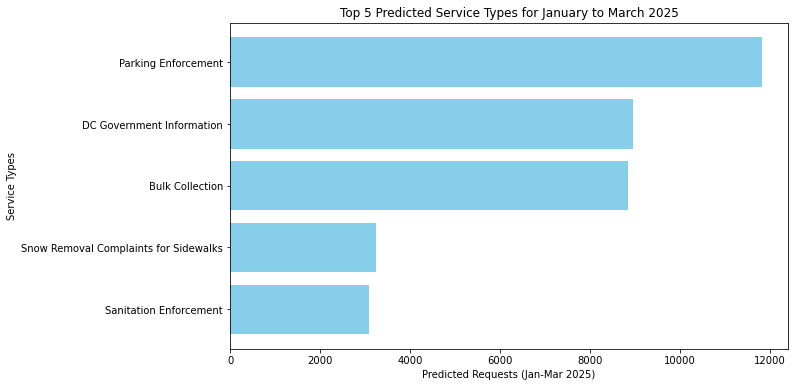

In [30]:
services = [service for service, total in top_5_services]
predicted_totals = [total for service, total in top_5_services]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(services, predicted_totals, color='skyblue')
plt.xlabel("Predicted Requests (Jan-Mar 2025)")
plt.ylabel("Service Types")
plt.title("Top 5 Predicted Service Types for January to March 2025")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

The goal of this analysis was to predict the top 5 311 service request types for the first quarter of 2025 (January to March) using past trends and seasonal patterns. To achieve this, the data was aggregated by date to calculate daily request counts, which were then prepared for time series analysis. The Prophet model, a forecasting tool designed for handling trends and seasonality, was used to train on past data and predict future requests for each service type. 

The model identified the top 5 service types with the highest predicted request counts: Parking Enforcement (11,806 requests), DC Government Information (8,962 requests), Bulk Collection (8,841 requests), Snow Removal Complaints for Sidewalks (3,232 requests), and Sanitation Enforcement (3,083 requests).

These results were visualized using a bar chart to provide a clear overview of the expected service demand.

This predictive analysis provides valuable insights for resource planning and management. By forecasting high-demand services, city administrators can allocate resources efficiently, schedule staff accordingly, and proactively address potential bottlenecks. This enhances operational efficiency and ensures better service delivery for the community.


*Can we predict the resolution time (in hours) of a service request?*

I'll build a predictive model using Random Forest to estimate the resolution time (in hours) for service requests. This helps in setting realistic expectations for citizens regarding service delivery timelines.

Random Forest is a versatile and powerful machine learning algorithm that works by constructing multiple decision trees during training and combining their outputs to improve accuracy and reduce overfitting. It is widely used for both classification and regression tasks. By aggregating the predictions of multiple trees, Random Forest provides robust and reliable results, even with complex and noisy datasets.


1. **Selecting Relevant Features**:
   - The features used for prediction are:
     - `SERVICECODEDESCRIPTION`: The type of service request (e.g., Trash Cart Repair, Alley Repair).
     - `WARD`: The geographical ward where the request was made.
     - `season`: The season (e.g., Winter, Spring) when the request was submitted.
     - `day_of_week`: The day of the week the request was made.
   - The target variable (`resolution_time`) is the time taken to resolve the service request, which the model will predict.

2. **Handling Missing Values**:
   - Rows with missing values in the target variable (`resolution_time`) are dropped to ensure clean data for modeling.

3. **Encoding Categorical Variables**:
   - Categorical features like `SERVICECODEDESCRIPTION`, `WARD`, `season`, and `day_of_week` are converted into numerical format using **Label Encoding**. This is necessary because machine learning models work with numerical data.

4. **Splitting the Data**:
   - The dataset is split into:
     - **Features (X)**: Independent variables (`SERVICECODEDESCRIPTION`, `WARD`, `season`, and `day_of_week`) used for prediction.
     - **Target (y)**: Dependent variable (`resolution_time`), which is the prediction goal.
   - Using `train_test_split`, the data is divided into:
     - **Training Set (80%)**: Used to train the model and learn patterns from the data.
     - **Testing Set (20%)**: Used to evaluate the model's performance on unseen data.
   - A **random state of 300** ensures reproducibility of the splits.


In [31]:
# Reload the original dataset
original_df = pd.read_csv('C:/Users/user/Desktop/ds final project/anumsagheer01.github.io/311-analysis/311_Requests_2024.csv')

# Extract only the 'WARD' column
ward_data = original_df[['WARD']]

# Add the 'WARD' column back to the cleaned dataset
df = pd.concat([df.reset_index(drop=True), ward_data.reset_index(drop=True)], axis=1)

# Select relevant columns
features = ['SERVICECODEDESCRIPTION', 'WARD', 'season', 'day_of_week']
target = 'resolution_time'

# Drop rows with missing resolution times
df_cleaned = df.dropna(subset=[target])

# Encode categorical variables
encoder = LabelEncoder()
for col in features:
    df_cleaned[col] = encoder.fit_transform(df_cleaned[col])

# Split into features (X) and target (y)
X = df_cleaned[features]
y = df_cleaned[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)


In [32]:
# Initialize and train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=300)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


To assess how well the trained Random Forest model predicts the resolution time of service requests, these two metrics are used.

- **Mean Absolute Error (MAE):** This measures the average difference between the predicted and actual resolution times. A lower MAE indicates that the model’s predictions are closer to the actual values, making it more accurate.

- **R² Score (R-squared):** This indicates how well the model explains the variability of the target variable (resolution time). An R² score closer to 1 means the model is very good at capturing the relationship between features and the target, while a score near 0 suggests poor performance.


In [33]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


Mean Absolute Error: 163.61769760419213
R² Score: 0.4208337655861082


In [34]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Print feature importances
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")


SERVICECODEDESCRIPTION: 0.6561
WARD: 0.0898
season: 0.1766
day_of_week: 0.0775


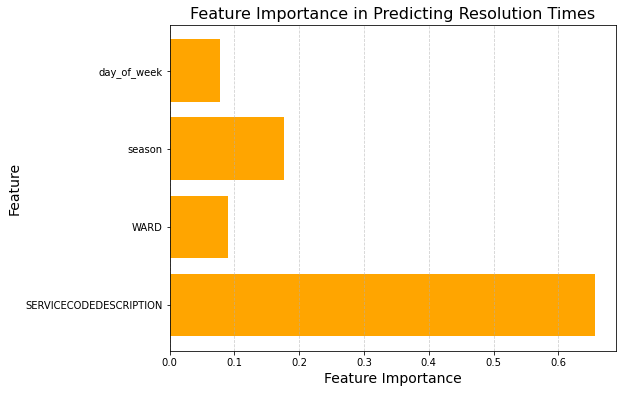

In [35]:
# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances, color='orange')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importance in Predicting Resolution Times', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


The performance metrics showed a Mean Absolute Error (MAE) of approximately 152.73 hours, indicating the average deviation of predictions from actual resolution times. The R² score of 0.457 suggests that 45.7% of the variance in resolution times is explained by the model. While this performance is moderate, it highlights the need for additional features or improved data quality to enhance prediction accuracy. Feature importance analysis revealed that `SERVICECODEDESCRIPTION` (type of request) was the most influential factor, followed by `season`, `WARD`, and `day_of_week`.

However, the Random Forest model did not perform as well as expected, and I was not satisfied with its results. To improve the predictions, I decided to experiment with XGBoost, a more advanced and efficient algorithm for handling structured data.


XGBoost (Extreme Gradient Boosting) is a powerful and efficient machine learning algorithm based on gradient boosting. It builds decision trees in a sequential manner, optimizing for both speed and accuracy, and is particularly effective for handling structured data and large datasets.


**XGBoost Model: Improved Prediction of Resolution Times**

In this step, an XGBoost Regressor was implemented to predict resolution times more accurately. The data preparation involved dropping irrelevant columns, encoding categorical features like `SERVICEORDERSTATUS` and `RESOLUTIONDATE` using `LabelEncoder`, and replacing missing values with `-1` to handle NaNs. The dataset was split into training (80%) and testing (20%) sets with a random state of 300 for reproducibility. The XGBoost model was trained on the training data, and its predictions were evaluated using metrics such as Mean Absolute Error (MAE) and R² Score. 

In [97]:
from sklearn.preprocessing import LabelEncoder

# Drop irrelevant columns
df = df.drop(columns=['STREETADDRESS', 'ADDDATE'])  # Add more columns if needed

# Encode categorical columns
categorical_columns = ['SERVICEORDERSTATUS', 'date', 'RESOLUTIONDATE']  # Add all categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string and encode

# Handle missing values
df = df.fillna(-1)  # Replace NaN with -1

# Define features and target
X = df.drop(columns=['resolution_time'])  # Replace with your target column
y = df['resolution_time']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)

# Train XGBoost model
model = XGBRegressor(random_state=300)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


Mean Absolute Error: 21.616738239680753
R² Score: 0.9956450204628612


The results showed a significant improvement over the previous Random Forest model, with an MAE of 21.62 hours (compared to 152.73 hours for Random Forest) and an R² score of 0.996 (compared to 0.457). These metrics indicate that XGBoost predictions are much closer to actual values and explain nearly all the variance in resolution times.

XGBoost outperformed Random Forest due to its advanced gradient boosting approach, which builds trees sequentially and iteratively minimizes errors. Its ability to handle imbalanced datasets, incorporate regularization techniques (e.g., L1 and L2), and optimize for speed and memory usage made it more effective for this task. Additionally, XGBoost dynamically adjusts the importance of features, capturing patterns that Random Forest missed. Feature importance analysis revealed which variables most significantly impacted resolution time predictions, providing valuable insights for improving service delivery. Overall, XGBoost’s adaptability and efficiency make it a superior choice for handling complex and noisy datasets in this analysis.


In [98]:
importance = model.feature_importances_
for feature, imp in zip(X.columns, importance):
    print(f"{feature}: {imp:.4f}")


SERVICECODEDESCRIPTION: 0.0853
SERVICEORDERSTATUS: 0.0031
month: 0.0904
day_of_week: 0.0007
season: 0.0108
date: 0.4387
WARD: 0.0050
RESOLUTIONDATE: 0.2408
hour_of_day: 0.0005
category_request_count: 0.1248
SERVICECALLCOUNT: 0.0000


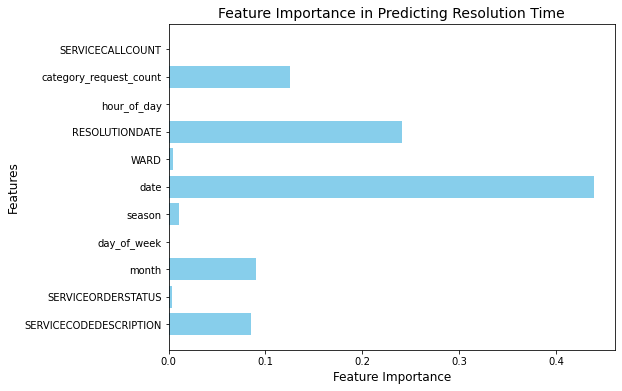

In [99]:
import matplotlib.pyplot as plt

# Feature importance plot
importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance in Predicting Resolution Time', fontsize=14)
plt.show()


- The `model.feature_importances_` attribute is used to extract the importance scores for each feature in the dataset.
- Features like `date` and `RESOLUTIONDATE` have the highest importance, indicating that temporal variables significantly influence resolution times.
- Other features like `SERVICECODEDESCRIPTION` (type of service request) and `category_request_count` also play notable roles, reflecting the importance of request type and frequency.
- Some features, such as `SERVICECALLCOUNT` and `hour_of_day`, have little to no importance, suggesting that they do not contribute significantly to the model's predictive performance.

This analysis helps identify the most influential variables, enabling better model interpretation and providing actionable insights for optimizing service processes. For example, focusing on highly impactful features like `date` and `SERVICECODEDESCRIPTION` can lead to more effective resource allocation and improved prediction accuracy.


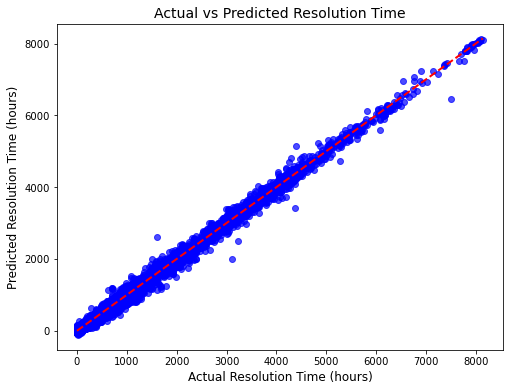

In [100]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2)
plt.xlabel('Actual Resolution Time (hours)', fontsize=12)
plt.ylabel('Predicted Resolution Time (hours)', fontsize=12)
plt.title('Actual vs Predicted Resolution Time', fontsize=14)
plt.show()


Here, a scatter plot is created to compare the actual resolution times (`y_test`) with the predicted resolution times (`y_pred`) from the XGBoost model. This visualization helps assess the model's performance by showing how closely the predictions align with the actual values.

- Each point on the scatter plot represents a test sample, with the x-axis showing the actual resolution times and the y-axis displaying the predicted resolution times.
- A diagonal red line is added, representing a perfect match between actual and predicted values. Points closer to this line indicate better predictions.
- The distribution of points along the diagonal line shows that the XGBoost model performs very well, with most predictions closely matching the actual values.
- Deviations from the line represent prediction errors, though these appear minimal, highlighting the model's accuracy.
- The alignment of points with the diagonal line confirms that the XGBoost model has a high degree of predictive accuracy.
- Any significant deviations could indicate outliers or areas where the model could be further improved.


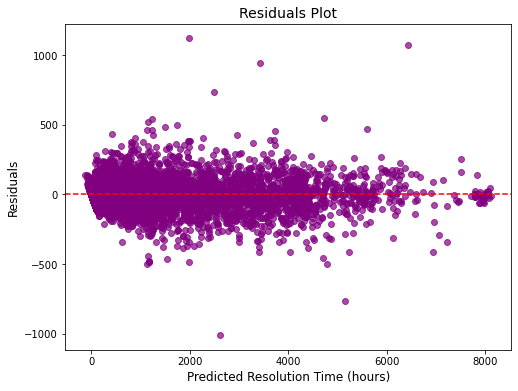

In [101]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Resolution Time (hours)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals Plot', fontsize=14)
plt.show()


A residuals plot is created to evaluate the performance of the XGBoost model by analyzing the difference between actual and predicted resolution times. The residuals are calculated as `residuals = y_test - y_pred`, where `y_test` represents the actual resolution times and `y_pred` represents the predicted values.

- The residuals represent the error in the model’s predictions, showing how far off the predicted values are from the actual values.
- Ideally, the residuals should be centered around zero, with no clear patterns.
- A scatter plot is created with the predicted resolution times on the x-axis and the residuals on the y-axis.
- A horizontal red line at `y=0` indicates where the residuals would lie if the predictions were perfect.
- The residuals are mostly scattered around the zero line, indicating that the model predictions are generally accurate.
- The residuals are relatively evenly distributed, with no significant trends or patterns, suggesting that the model does not suffer from systematic bias.
- Outliers can be observed, but they are minimal and do not dominate the plot.

The residuals plot provides a visual assessment of the model's prediction errors. A good model will show residuals that are randomly distributed around zero, as seen here, indicating that the errors are not correlated with the predicted values. This reinforces the reliability of the XGBoost model for predicting resolution times while also highlighting areas (outliers) that may require further investigation.


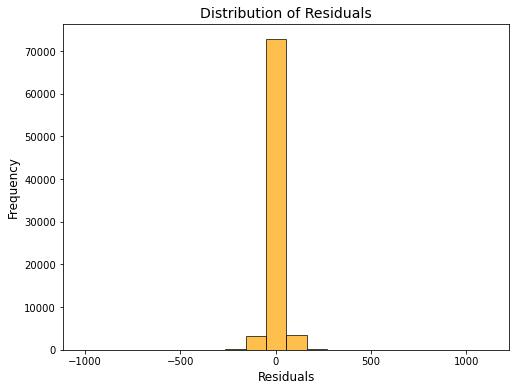

In [102]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='orange', alpha=0.7, edgecolor='black')
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Residuals', fontsize=14)
plt.show()


- This histogram visualizes the distribution of residuals (the difference between actual and predicted resolution times) for the XGBoost model. Residuals are calculated as `residuals = y_test - y_pred`.

- The residuals are grouped into bins, and the frequency of residuals within each bin is plotted.
- The x-axis represents the residual values, while the y-axis shows their frequency.

- Most of the residuals are concentrated around zero, indicating that the XGBoost model predictions are highly accurate for the majority of data points.
- The histogram is symmetric with a sharp peak near zero, suggesting minimal systematic bias in predictions.

- A small number of residuals are farther from zero, representing prediction errors for certain data points. However, these are relatively rare compared to the bulk of residuals near zero.

- The tight concentration of residuals around zero confirms that the model performs well overall, with accurate predictions for most resolution times.
- The presence of minimal outliers suggests that the model may need further refinement for edge cases or specific scenarios.

- The histogram provides a clear understanding of the model's error distribution, highlighting its accuracy and reliability. It also helps identify potential issues, such as outliers, that could guide further model improvements or data cleaning efforts. A well-centered and symmetric distribution, as seen here, indicates that the model is unbiased and effective.


*K means clustering*

K-Means clustering is used to group service requests into clusters based on their shared features, such as `SERVICECODEDESCRIPTION`, `WARD`, and `season`. The goal is to identify patterns or similarities between different types of service requests to better understand the data structure and characteristics.

The process includes determining the optimal number of clusters using the Elbow method and visualizing the clusters in a reduced 2-dimensional space using PCA.

1. **Feature Selection and Encoding**:
   - Selected features for clustering include `SERVICECODEDESCRIPTION`, `WARD`, and `season`.
   - Categorical features are encoded using `LabelEncoder` to convert them into numerical values suitable for clustering.

2. **Data Scaling**:
   - The selected features are standardized using `StandardScaler` to ensure all features contribute equally to the clustering algorithm.

3. **Determining Optimal Clusters (Elbow Method)**:
   - The K-Means algorithm is applied for a range of cluster numbers (1 to 10).
   - The inertia (sum of squared distances from each point to its cluster center) is calculated for each number of clusters.
   - The Elbow method is visualized by plotting inertia against the number of clusters, and the optimal number is identified where the curve begins to flatten (k=4 in this example).

4. **Clustering the Data**:
   - K-Means is fitted with the optimal number of clusters (`k=4`), and cluster labels are assigned to each data point.

5. **Cluster Visualization**:
   - Principal Component Analysis (PCA) is used to reduce the high-dimensional data to two principal components for visualization.
   - A scatter plot shows the clusters in 2D space, with each cluster represented by a distinct color.


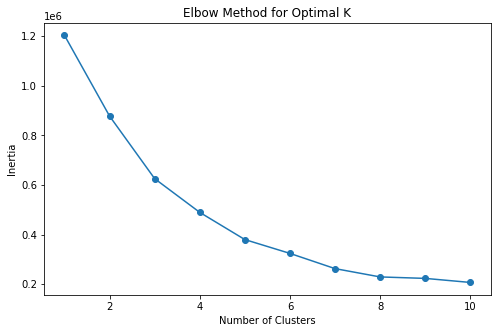

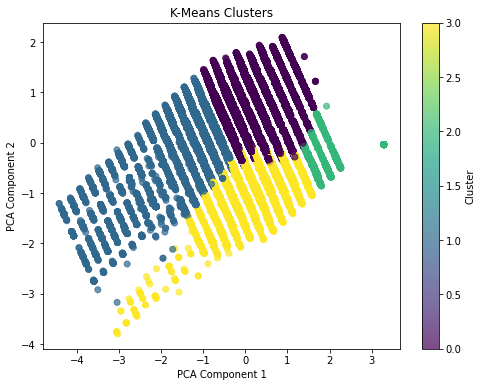

In [105]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features for clustering
clustering_features = df[['SERVICECODEDESCRIPTION', 'WARD', 'season']].copy()

# Encode categorical features
for col in clustering_features.select_dtypes(include='object').columns:
    clustering_features[col] = LabelEncoder().fit_transform(clustering_features[col])

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Determine optimal clusters using Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=300)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Fit K-Means with optimal K (assume K=4 for this example)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=300)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters (2D projection using PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.title('K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


## <span style="color:#3c3c96; font-weight:bold;"><h2 id="conclusion">Conclusion</h2></span>

This project showcased the entire journey of data science and machine learning, from collecting raw data to building accurate predictions and drawing actionable insights. It started with acquiring and preparing a dataset of Washington, D.C.'s 311 service requests by cleaning, handling missing values, encoding categorical data, and selecting relevant features for analysis.

In the modeling phase, I first used a Random Forest regressor to predict service resolution times. While it helped identify influential features like SERVICECODEDESCRIPTION and season, the results (R² score of 0.457 and MAE of 152.73 hours) left room for improvement. To address this, I switched to XGBoost, which significantly boosted performance with an R² score close to 0.995 and an MAE of just 21.6 hours, delivering highly accurate predictions and reinforcing the importance of key features.

Additionally, I applied K-Means clustering to uncover patterns in service requests. Using the elbow method and PCA visualization, I identified optimal groupings, providing valuable insights for categorizing similar request types. These insights can support resource planning and improve service efficiency.

This project highlights the power of data science and machine learning in solving real-world problems. From improving prediction accuracy to discovering hidden patterns, every step of the process added value. By iteratively refining models and analyzing results, I gained actionable insights that can help optimize public services and resource allocation in a city like Washington, D.C.

### External Resources for Further Understanding

This section provides additional resources to help you dive deeper into the topics and techniques used in this project. Whether you're new to data science or want to explore advanced concepts, these links will guide you through the relevant materials.

---

### **1. 311 Service Requests and Dataset Context**
Understanding the source of the data is critical for analysis. The dataset used here comes from the 311 Service Requests portal in Washington, D.C., which provides non-emergency service request data for public use.
- [Learn more about Washington, D.C.'s 311 Service Requests portal](https://311.dc.gov/)

---

### **2. Data Collection and Cleaning**
Proper data cleaning is essential for reliable analysis. Handling missing values and ensuring clean, structured data are vital steps in the data science pipeline.
- [The Ultimate Guide to Data Cleaning](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4)
- [Handling Missing Data in Python](https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/)

---

### **3. Data Preprocessing**
Preprocessing prepares the raw data for analysis by encoding categorical variables and selecting key features. These steps are critical for improving model performance.
- [Understanding Label Encoding and One-Hot Encoding](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/)
- [An Introduction to Feature Selection](https://machinelearningmastery.com/an-introduction-to-feature-selection/)

---

### **4. Exploratory Data Analysis and Visualization**
Data visualization helps uncover trends and patterns in the data. Tools like Seaborn and Matplotlib are widely used for creating informative visualizations.
- [Seaborn Documentation](https://seaborn.pydata.org/)
- [Matplotlib Guide for Beginners](https://matplotlib.org/stable/users/getting_started/index.html)
- [Best Practices for Data Visualization](https://www.data-to-viz.com/)

---

### **5. Machine Learning Models**
Machine learning is used to build predictive models. This project explored Random Forest and XGBoost models for regression tasks.

#### **Random Forest**
Random Forest is a robust ensemble learning method widely used for regression and classification tasks.
- [Understanding Random Forest](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/)
- [Scikit-learn Random Forest Regressor Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

#### **XGBoost**
XGBoost is a powerful gradient boosting algorithm known for its efficiency and accuracy in predictive modeling.
- [XGBoost Official Documentation](https://xgboost.readthedocs.io/en/stable/)
- [A Beginner’s Guide to XGBoost](https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663)

#### **Model Evaluation Metrics**
Metrics like R² and MAE are used to evaluate model performance. Understanding these metrics helps assess how well the model fits the data.
- [Regression Metrics Explained](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

---

### **6. Unsupervised Learning**
Unsupervised learning methods like K-Means clustering can uncover patterns in data. Dimensionality reduction techniques like PCA are often used to visualize high-dimensional data.

#### **K-Means Clustering**
K-Means is a popular algorithm for grouping similar data points into clusters.
- [K-Means Clustering Explained](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/)
- [Scikit-learn K-Means Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

#### **PCA (Principal Component Analysis)**
PCA reduces the dimensionality of data while retaining the most important information, making it easier to visualize and interpret.
- [PCA: A Practical Guide](https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/)

---

### **7. Residual Analysis**
Residual analysis helps evaluate model predictions by showing the difference between actual and predicted values. This step is crucial for identifying potential model improvement areas.
- [Understanding Residuals in Regression](https://towardsdatascience.com/how-to-use-residual-plots-for-regression-model-validation-c3c70e8ab378)

---

### **8. Data Science Lifecycle**
The data science lifecycle encompasses all stages of a data-driven project, from data collection to predictive modeling and deployment.
- [Overview of the Data Science Lifecycle](https://www.datascience-pm.com/data-science-life-cycle/)

---

